# Gradient Boosting

**Project Goal**: 

In [3]:
import pickle

import ipywidgets as widgets
import pandas as pd

from imblearn.over_sampling import RandomOverSampler

from ipywidgets import interact
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline


#### Import Data

In [4]:
def wrangle(url):
    df = pd.read_csv(url)
    #Re-code the class variable to True = 1, and False = 0:
    df['class'] = df['class'].replace({0: False, 1: True})
    
    #Rename the class variable to bankrupt
    df = df.rename(columns={'class': 'bankrupt'}) #.set_index("year")

    return df

In [5]:
df = wrangle("https://archive.ics.uci.edu/static/public/365/data.csv")
df.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18732\3935766308.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({0: False, 1: True})


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A56,A57,A58,A59,A60,A61,A62,A63,A64,bankrupt
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,False
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,False
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,False
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,False
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,False


Split Data

Split data vertically into X (the features) and y(the target)

In [6]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (43405, 65)
y shape: (43405,)


Split Data horizontally - train and test sets:

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34724, 65)
y_train shape: (34724,)
X_test shape: (8681, 65)
y_test shape: (8681,)


Resample - Oversampling

In [8]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (66134, 65)


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
0,2,0.011741,0.16073,0.86122,9.01580,78.2200,0.00000,0.011741,5.22180,3.6825,...,664.37,-0.024248,0.013989,0.99690,0.000000,117.9300,7.8634,10.649,34.2740,117.5200
1,4,0.014255,0.64316,-0.13909,0.74883,-60.0520,0.14122,0.018677,0.55483,1.3970,...,-9530.10,0.014543,0.039947,0.98682,0.000000,17.7250,4.4423,144.690,2.5226,2.3867
2,5,0.193900,0.21336,0.36632,5.37230,107.3500,0.00000,0.237870,3.68700,1.0041,...,45806.00,0.224590,0.246500,0.77180,0.000097,6.6326,12.4530,30.456,11.9850,1.8259
3,2,0.023822,0.36616,0.13694,1.59920,-0.3469,0.14385,0.031073,1.58600,1.0328,...,6940.90,0.031790,0.041021,0.96821,0.236980,8.2365,5.0675,76.347,4.7808,1.7219
4,5,-0.134580,1.30470,-0.30370,0.75369,-101.1400,-0.55080,-0.134580,-0.23351,2.3623,...,-917.38,0.021443,0.441740,1.05650,-0.235180,7.0359,5.1234,190.510,1.9159,33.4140


#### Build Model

Baseline Model

In [11]:
acc_baseline = y_train.value_counts(normalize=True).max().round(4)
print("Baseline Accuracy:", acc_baseline)

Baseline Accuracy: 0.9523


Iterate

The first step is to create a pipeline for gradient boosting classifier

In [12]:
clf = make_pipeline(SimpleImputer(), GradientBoostingClassifier())

Hyperparemeter Grid

In [13]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "gradientboostingclassifier__n_estimators": range(20,31,5),
    "gradientboostingclassifier__max_depth": range(2, 5)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

Grid Search Cv

In [14]:
model = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1,verbose=1)

Fitting the Model

In [15]:
# Fit model to over-sampled training data
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

CV Results

In [16]:
results = pd.DataFrame(model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,103.630081,17.436682,0.043090,0.009755,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.884857,0.884479,0.881455,0.876540,0.867912,0.879048,0.006314,1
16,122.312570,1.105402,0.073539,0.005850,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.883345,0.880094,0.877826,0.874575,0.873129,0.877794,0.003694,2
14,108.329876,2.798871,0.073893,0.006043,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.878052,0.873743,0.871702,0.868905,0.866778,0.871836,0.003911,3
15,109.659484,0.840134,0.071182,0.004418,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.875104,0.867392,0.870114,0.868300,0.856570,0.867496,0.006079,4
12,83.083831,0.641253,0.071005,0.006380,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.868980,0.861798,0.861722,0.858698,0.856495,0.861539,0.004219,5
13,84.454244,0.560363,0.068808,0.001553,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.863159,0.855220,0.859832,0.856279,0.847119,0.856322,0.005385,6
10,97.346323,0.842893,0.069682,0.002581,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.846828,0.846602,0.844107,0.841083,0.836307,0.842985,0.003932,7
8,82.606803,1.861667,0.072332,0.015412,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.840100,0.839495,0.838739,0.835412,0.829578,0.836665,0.003896,8
11,95.695535,0.566124,0.071162,0.002090,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.833976,0.840175,0.834732,0.828079,0.824361,0.832265,0.005506,9
6,74.894779,7.459520,0.068000,0.004612,3,20,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.831859,0.831405,0.829893,0.830045,0.817405,0.828122,0.005412,10


Best Hyperparameters

In [17]:
# Extract best hyperparameters
model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'median'}

Evaluate

Train/test accuracy

In [18]:
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.876
Test Accuracy: 0.8686


Plot Confusion Matrix

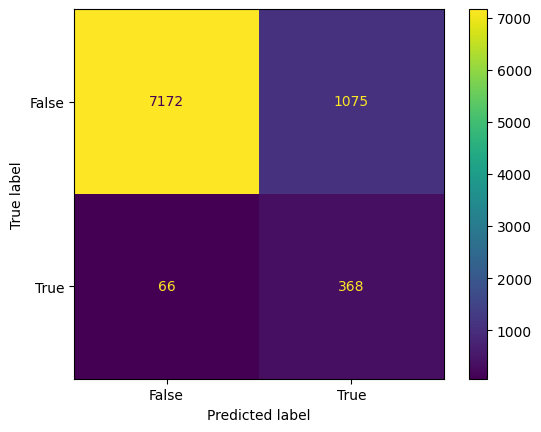

In [19]:
# Plot confusion
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

Classification Report

Precision vs Recall:

- The precision score is important when we want our model to only predict that a company will go bankrupt if its very confident in its prediction. 
- The recall score is important if we want to make sure to identify all the companies that will go bankrupt, even if that means being incorrect sometimes.

In [20]:
# Print classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      0.87      0.93      8247
        True       0.26      0.85      0.39       434

    accuracy                           0.87      8681
   macro avg       0.62      0.86      0.66      8681
weighted avg       0.95      0.87      0.90      8681

